In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

from utils import color_transfer


In [2]:
image_path = "/home/nlang/code/satellite_sr/data/lr_factor_1x/hr_ground_truth.png"

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

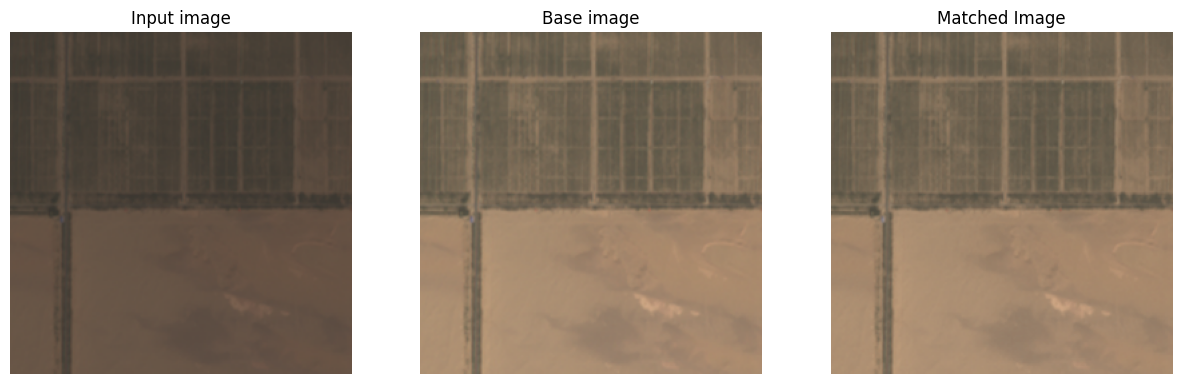

In [3]:
# set seed
torch.manual_seed(0)

# Load the image using PIL
image = Image.open(image_path).convert("RGB")  # Convert to RGB if it's not already

# Define a transform to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor (normalizes to [0, 1])
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
])

# Apply the transform to the image
base_image = transforms.ToTensor()(image) 
image = transform(image)



# Example for standard PyTorch images with value ranges of [0-1]
matched_image = color_transfer(image, base_image).clamp(0, 1).squeeze(0)



# plot matched image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(transforms.ToPILImage()(image))
ax[0].set_title("Input image")
ax[0].axis("off")
ax[1].imshow(transforms.ToPILImage()(base_image))
ax[1].set_title("Base image")
ax[1].axis("off")
ax[2].imshow(transforms.ToPILImage()(matched_image))
ax[2].set_title("Matched Image")
ax[2].axis("off")